In [1]:
#import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load datasets
df = pd.read_csv('data/placements.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [3]:
df.shape

(1000, 3)

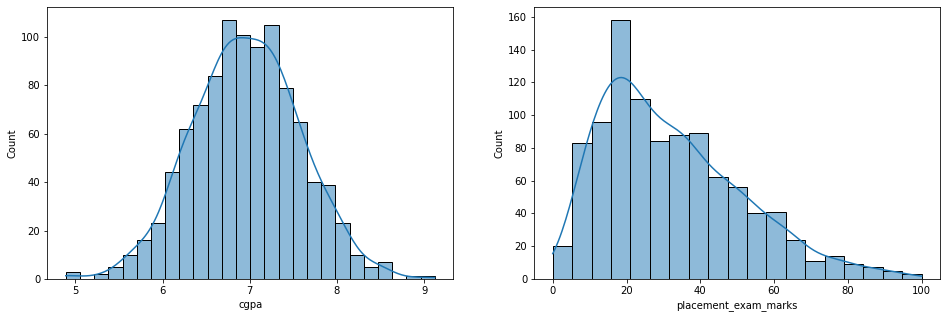

In [4]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.show()

In [5]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

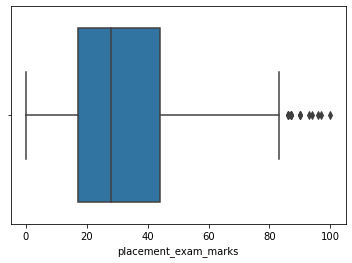

In [6]:
sns.boxplot(x='placement_exam_marks', data=df)
plt.show()

In [7]:
# Finding the IQR
Q1 = df['placement_exam_marks'].quantile(0.25)
Q3 = df['placement_exam_marks'].quantile(0.75)

Q1, Q3

(17.0, 44.0)

In [8]:
iqr = Q3 - Q1
iqr

27.0

In [9]:
# calculating boundary
upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr

print("Upper limit: ",upper_limit)
print("Lower limit: ",lower_limit)

Upper limit:  84.5
Lower limit:  -23.5


In [10]:
#finding outliers
df[(df['placement_exam_marks'] > upper_limit) | (df['placement_exam_marks'] < lower_limit)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


### trimming

In [11]:
df_new = df[(df['placement_exam_marks'] > lower_limit) & (df['placement_exam_marks'] < upper_limit)]
df_new.shape

(985, 3)

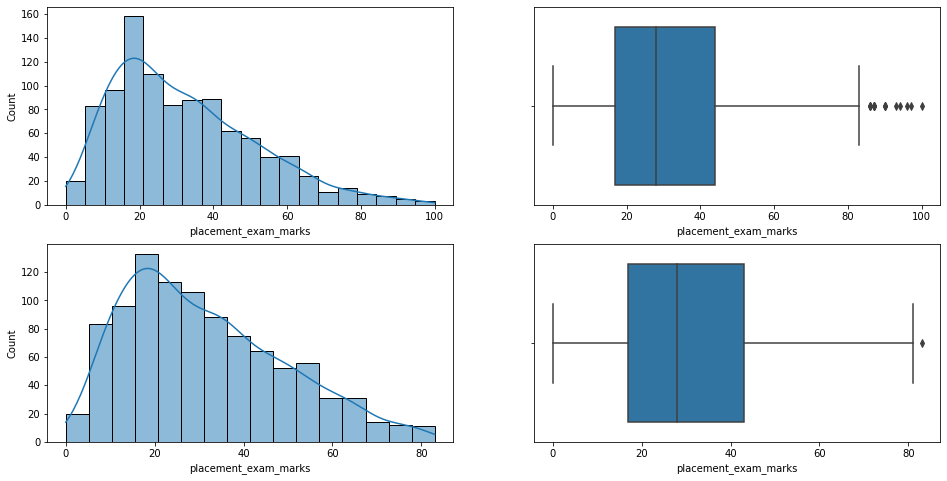

In [12]:
# Comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(x = 'placement_exam_marks', data = df)

plt.subplot(2,2,3)
sns.histplot(df_new['placement_exam_marks'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(x = 'placement_exam_marks', data = df_new)

plt.show()

### capping

In [13]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

new_df_cap.shape

(1000, 3)

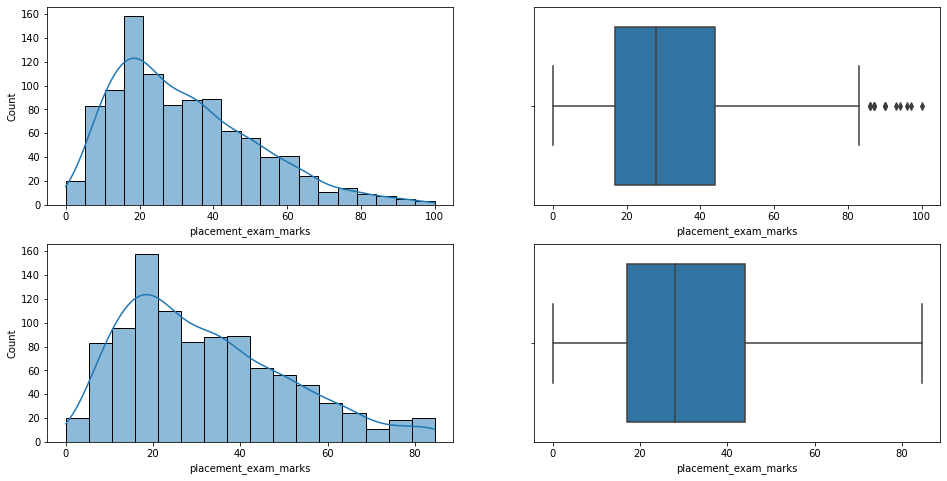

In [14]:
# Comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(x='placement_exam_marks', data=df, kde=True)

plt.subplot(2,2,2)
sns.boxplot(x='placement_exam_marks', data = df)

plt.subplot(2,2,3)
sns.histplot(x='placement_exam_marks', data=new_df_cap, kde=True)

plt.subplot(2,2,4)
sns.boxplot(x='placement_exam_marks', data=new_df_cap)

plt.show()